In [4]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [7]:
# Use the citipy mocule to determine city based on latitude and longitude
from citipy import citipy

In [28]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [9]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Import the datetime module from the datetime library
from datetime import datetime

In [29]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval                        ")
print("------------------------------------------------")

# Create counters
record_counter = 1
set_count = 1

Beginning Data Retrieval                        
------------------------------------------------


In [30]:
# Loop through all the cities in our list
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1

# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | devrek
Processing Record 2 of Set 13 | saint-augustin
Processing Record 3 of Set 13 | mataura
Processing Record 4 of Set 13 | volksrust
Processing Record 5 of Set 13 | kamyshlov
Processing Record 6 of Set 13 | rzhaksa
Processing Record 7 of Set 13 | rawson
Processing Record 8 of Set 13 | bukit bakri
City not found. Skipping...
Processing Record 9 of Set 13 | cayenne
Processing Record 10 of Set 13 | carnarvon
Processing Record 11 of Set 13 | bredasdorp
Processing Record 12 of Set 13 | muisne
Processing Record 13 of Set 13 | ushuaia
Processing Record 14 of Set 13 | upernavik
Processing Record 15 of Set 13 | namatanai
Processing Record 16 of Set 13 | isangel
Processing Record 17 of Set 13 | qaanaaq
Processing Record 18 of Set 13 | fairbanks
Processing Record 19 of Set 13 | albany
Processing Record 20 of Set 13 | chapais
Processing Record 21 of Set 13 | san cristobal
Processing Record 22 of Set 13 | nurota
Processing Record 23 of Set 13 | mazara del vallo
Pr

In [14]:
len(city_data)

563

In [31]:
# Convert the array of dictionaires to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Devrek,41.2192,31.9558,48.96,91,8,3.36,TR,2021-10-02 00:22:05
1,Saint-Augustin,51.2260,-58.6502,44.19,84,100,24.07,CA,2021-10-02 00:22:05
2,Mataura,-46.1927,168.8643,57.47,60,100,5.91,NZ,2021-10-02 00:19:36
3,Volksrust,-27.3654,29.8818,55.65,83,84,9.37,ZA,2021-10-02 00:22:06
4,Kamyshlov,56.8428,62.7111,32.97,75,79,4.68,RU,2021-10-02 00:22:06
5,Rzhaksa,52.1338,42.0264,42.53,84,47,3.80,RU,2021-10-02 00:22:07
6,Rawson,-43.3002,-65.1023,53.69,52,100,24.38,AR,2021-10-02 00:19:51
7,Cayenne,4.9333,-52.3333,83.08,79,17,1.99,GF,2021-10-02 00:22:08
8,Carnarvon,-24.8667,113.6333,68.07,49,16,12.66,AU,2021-10-02 00:19:31
9,Bredasdorp,-34.5322,20.0403,46.27,85,81,8.63,ZA,2021-10-02 00:19:38


In [32]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Devrek,TR,2021-10-02 00:22:05,41.2192,31.9558,48.96,91,8,3.36
1,Saint-Augustin,CA,2021-10-02 00:22:05,51.2260,-58.6502,44.19,84,100,24.07
2,Mataura,NZ,2021-10-02 00:19:36,-46.1927,168.8643,57.47,60,100,5.91
3,Volksrust,ZA,2021-10-02 00:22:06,-27.3654,29.8818,55.65,83,84,9.37
4,Kamyshlov,RU,2021-10-02 00:22:06,56.8428,62.7111,32.97,75,79,4.68
5,Rzhaksa,RU,2021-10-02 00:22:07,52.1338,42.0264,42.53,84,47,3.80
6,Rawson,AR,2021-10-02 00:19:51,-43.3002,-65.1023,53.69,52,100,24.38
7,Cayenne,GF,2021-10-02 00:22:08,4.9333,-52.3333,83.08,79,17,1.99
8,Carnarvon,AU,2021-10-02 00:19:31,-24.8667,113.6333,68.07,49,16,12.66
9,Bredasdorp,ZA,2021-10-02 00:19:38,-34.5322,20.0403,46.27,85,81,8.63


In [34]:
# Create the output file (csv)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [35]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

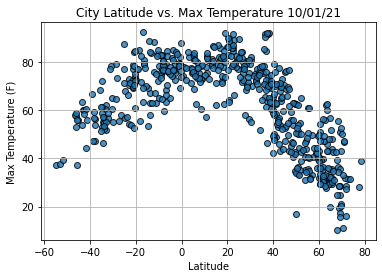

In [19]:
# Import the time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
            
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()


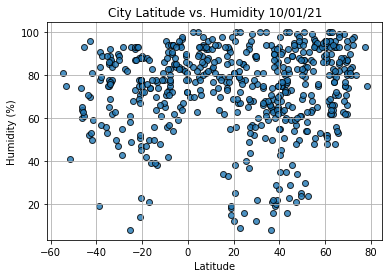

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

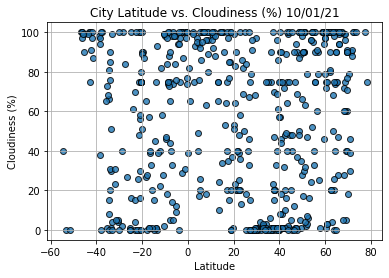

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

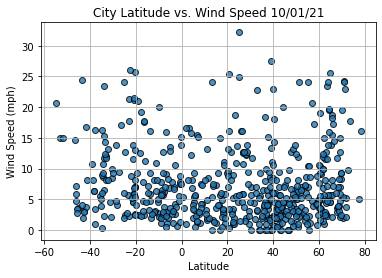

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept

    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values, "r")

    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                    Namatanai
Country                        PG
Date          2021-10-02 00:20:32
Lat                       -3.6667
Lng                      152.4333
Max Temp                    85.08
Humidity                       65
Cloudiness                     97
Wind Speed                    3.0
Name: 13, dtype: object

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Devrek,TR,2021-10-02 00:22:05,41.2192,31.9558,48.96,91,8,3.36
1,Saint-Augustin,CA,2021-10-02 00:22:05,51.2260,-58.6502,44.19,84,100,24.07
4,Kamyshlov,RU,2021-10-02 00:22:06,56.8428,62.7111,32.97,75,79,4.68
5,Rzhaksa,RU,2021-10-02 00:22:07,52.1338,42.0264,42.53,84,47,3.80
7,Cayenne,GF,2021-10-02 00:22:08,4.9333,-52.3333,83.08,79,17,1.99


In [26]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

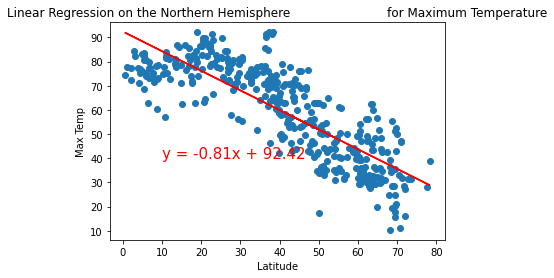

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


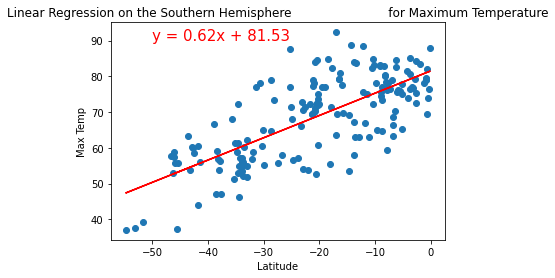

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

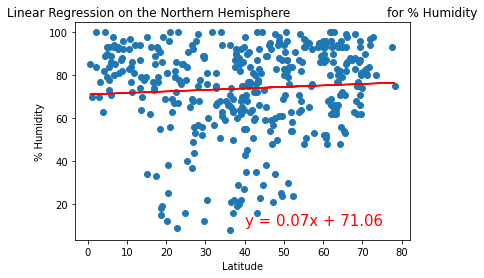

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

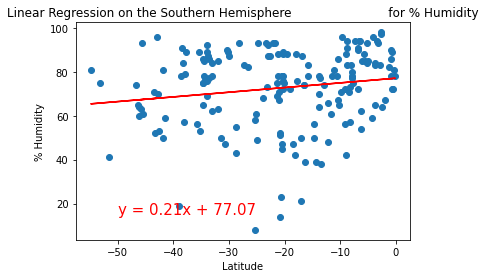

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

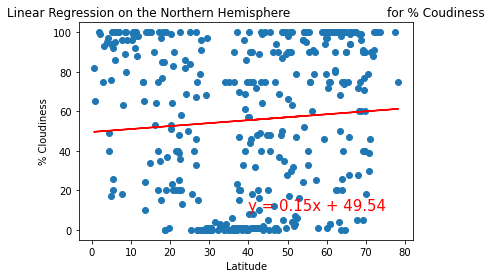

In [44]:
# Skill Drill 6.4.4
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Northern Hemisphere \
                        for % Coudiness', '% Cloudiness',(40,10))

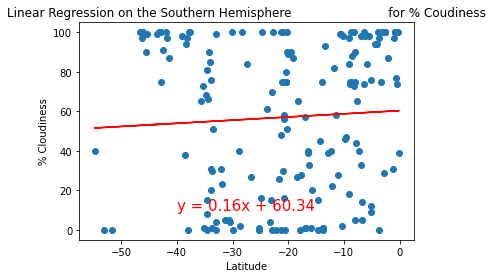

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Southern Hemisphere \
                        for % Coudiness', '% Cloudiness',(-40,10))

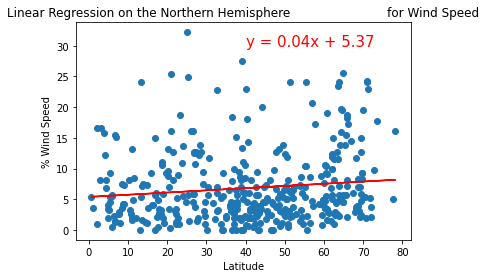

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', '% Wind Speed',(40,30))

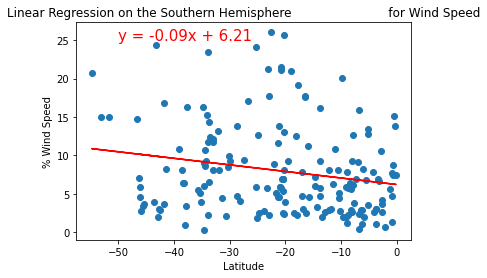

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', '% Wind Speed',(-50,25))